In [116]:
! pip install -U openai-whisper
! pip install pandas
! pip install convokit
! pip install nltk
! pip install spacy
! python -m spacy download en_core_web_sm
! pip install scipy
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 2

# Local Model

In [1]:
import whisper
import pandas as pd
import glob
import os
import re
import nltk
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jamesphoughton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# folder = "testVideos/constructive_disagreement/r20230929_1040_student_011/"
folder = "testVideos/bad_influence/01GZHCG1HYFKKMN1W9WD1RY69S/"
files = glob.glob(folder + "*-audio-*")

for file in files:
    if not file.endswith("webm"):
        os.rename(file, file + ".webm")

files = glob.glob(folder + "*-audio-*")
files

['testVideos/bad_influence/01GZHCG1HYFKKMN1W9WD1RY69S/1683137132032-2005124b-3558-4307-ad08-9a597c5f235f-cam-audio-1683137133001.webm',
 'testVideos/bad_influence/01GZHCG1HYFKKMN1W9WD1RY69S/1683137132032-e08cf933-67c7-4292-9067-c4b1bff106d4-cam-audio-1683137144593.webm',
 'testVideos/bad_influence/01GZHCG1HYFKKMN1W9WD1RY69S/1683137132032-95764377-b1ab-4aee-8af3-169dc5dca435-cam-audio-1683137133007.webm']

In [3]:
def getStart(filepath):

    probe = ! ffprobe $filepath 
    line = [line  for line in probe if "start: " in line][0]
    pattern = r"start:\s(\d+\.\d+)"
    match = re.search(pattern, line)
    if match:
        start = float(match.group(1))
    else:
        console.log("No start time listed, using 0.0")
        start = 0.0
    return start


In [4]:
model = whisper.load_model("base")

def transcribe(filepath):

    start = getStart(filepath)
    result = model.transcribe(filepath)
    df = pd.DataFrame(result['segments'])
    df["start"] = df['start'] + start
    df["end"] = df['end'] + start

    return df[["start", "end", "text"]]



In [5]:
res = [transcribe(filepath) for filepath in files ]

/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [6]:
for i, df in enumerate(res):
    df.set_index("start", inplace=True)
    df['speaker'] = i

transcript = pd.concat(res).sort_index()
transcript


,end,text,speaker
start,,,
0.940,12.380,"Hello, can you hear me?",0
4.112,9.112,"Yeah, hi.",2
12.380,15.380,Hello.,0
12.517,14.517,Hello.,1
14.517,22.517,It's been 30 seconds introducing yourselves.,1
...,...,...,...
1586.577,1592.657,wise it up to so I consider myself minority l...,1
1592.657,1597.057,little and come on all that and like why is i...,1
1597.057,1603.377,I use pop words I didn't like to do that like...,1


In [7]:
pd.options.display.max_colwidth = 200
transcript[[ "end", "speaker",  "text"]].head(60)
transcript.to_csv("transcript.csv")

([<matplotlib.axis.YTick at 0x3a22718b0>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

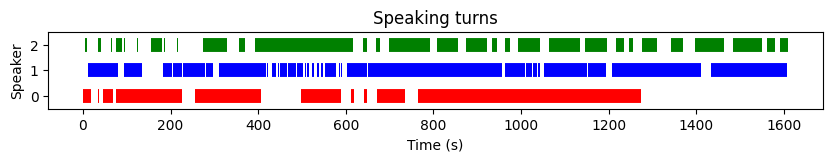

In [142]:
plt.figure(figsize=(10, 1))
plt.ylim(-.5, 2.5)
for speaker in transcript["speaker"].unique():
    rows = transcript[transcript["speaker"] == speaker]
    plt.hlines(rows['speaker'], rows.index, rows["end"], color=["r","b", "g"][speaker], linewidth=10)
    plt.ylabel("Speaker")
    plt.xlabel("Time (s)")
    plt.title("Speaking turns")
# plt.hlines(transcript["speaker"], transcript.index, transcript["end"], color="C0")
plt.yticks([0,1,2])

In [133]:
rows

,end,text,speaker
start,,,
0.94,12.38,"Hello, can you hear me?",0
12.38,15.38,Hello.,0
16.04,18.02,Hello?,0
34.28,35.68,What do you feel?,0
45.38,56.46,"Personally, I don't have a very neither's positive or negative, just because I don't have",0
...,...,...,...
1202.46,1220.46,Yeah.,0
1220.46,1238.46,Yeah.,0
1238.46,1260.46,Yeah.,0


# Word timings:

In [143]:
model = whisper.load_model("base")

def transcribe_words(filepath, speaker):

    start = getStart(filepath)
    result = model.transcribe(filepath, word_timestamps=True)
    collector = []
    for segment in result["segments"]:
        for word in segment["words"]:
            newWord = word.copy()
            newWord["start"] = word["start"] + start
            newWord["end"] = word["end"] + start
            newWord["speaker"] = speaker
            collector.append(newWord)

    df = pd.DataFrame(collector)
    return df

In [144]:
words = [transcribe_words(filepath, i) for i, filepath in enumerate(files) ]

/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/jamesphoughton/github/deliberation-video-analysis/.venv/lib/python3.9/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [145]:
words[0]

,word,start,end,probability,speaker
0,"Hello,",10.14,10.62,0.791418,0
1,can,10.84,10.96,0.908174,0
2,you,10.96,11.06,0.994853,0
3,hear,11.06,11.16,0.657913,0
4,me?,11.16,11.42,0.999053,0
...,...,...,...,...,...
1082,Yeah.,1195.96,1196.72,0.035228,0
1083,Yeah.,1197.02,1219.18,0.454490,0
1084,Yeah.,1219.18,1235.18,0.171002,0
1085,Yeah.,1235.18,1255.18,0.596804,0


([<matplotlib.axis.YTick at 0x3a2f13c40>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

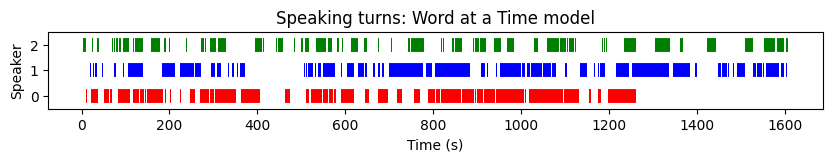

In [148]:
plt.figure(figsize=(10, 1))
plt.ylim(-.5, 2.5)
for speaker, rows in enumerate(words):
    plt.hlines(rows['speaker'], rows["start"], rows["end"], color=["r","b", "g"][speaker], linewidth=10)
    plt.ylabel("Speaker")
    plt.xlabel("Time (s)")
    plt.title("Speaking turns: Word at a Time model")

plt.yticks([0,1,2])

Text(0.5, 1.0, 'Duration of individual words')

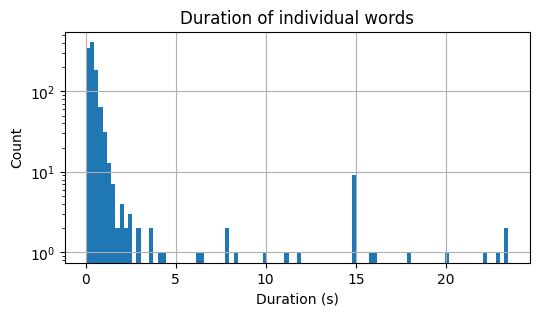

In [154]:
plt.figure(figsize=(6, 3))
words[0]['duration'] = words[0]['end'] - words[0]['start']
words[0]['duration'].hist(bins=100, log=True)
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.title("Duration of individual words")


In [158]:
words[0][words[0]['duration'] > 1.0].sort_values("duration", ascending=False).head(50)

,word,start,end,probability,speaker,duration
1077,Yeah.,1109.66,1133.14,0.337193,0,23.48
858,Yeah.,834.72,858.16,0.250270,0,23.44
779,Yeah.,675.39,698.17,0.277218,0,22.78
1083,Yeah.,1197.02,1219.18,0.454490,0,22.16
1085,Yeah.,1235.18,1255.18,0.596804,0,20.00
1033,Yeah.,987.02,1005.02,0.511798,0,18.00
1084,Yeah.,1219.18,1235.18,0.171002,0,16.00
760,Yeah.,599.61,615.39,0.368941,0,15.78
1072,Yeah.,1079.53,1094.52,0.101694,0,14.99
857,Yeah.,819.73,834.72,0.020016,0,14.99


In [176]:
backchannel_cues = [
  "ah",
  "alright",
  "awesome",
  "cool",
  "dope",
  "exactly",
  "god",
  "gotcha",
  "huh",
  "ha",
  "haha",
  "hahaha",
  "hmm",
  "mhm",
  "mm",
  "mmm",
  "nice",
  "oh",
  "okay",
  "really",
  "right",
  "sick",
  "sucks",
  "sure",
  "uh",
  "um",
  "wow",
  "yeah",
  "yep",
  "yes",
  "yup"
]

In [179]:
import string
translator = str.maketrans('', '', string.punctuation)

for i, rows in enumerate(words):
    words[i]['clean'] = words[i]['word'].apply(lambda x: x.lower().strip().translate(translator))
    words[i]['backchannel'] = words[i]['clean'].apply(lambda x: x in backchannel_cues)

([<matplotlib.axis.YTick at 0x3a138b820>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

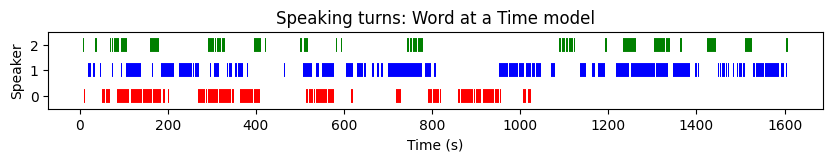

In [180]:
plt.figure(figsize=(10, 1))
plt.ylim(-.5, 2.5)
for speaker, df in enumerate(words):
    rows = df[df["backchannel"] == False]
    plt.hlines(rows['speaker'], rows["start"], rows["end"], color=["r","b", "g"][speaker], linewidth=10)
    plt.ylabel("Speaker")
    plt.xlabel("Time (s)")
    plt.title("Speaking turns: Word at a Time model")

plt.yticks([0,1,2])

In [178]:
words[0][words[0]['backchannel'] == False].sort_values("duration", ascending=False).head(50)

,word,start,end,probability,speaker,duration,backchannel,clean
780,I,718.01,722.45,0.161620,0,4.44,False,i
1016,to,946.68,950.30,0.888689,0,3.62,False,to
305,you,269.57,272.41,0.998824,0,2.84,False,you
975,that,922.14,924.96,0.709849,0,2.82,False,that
781,guess,722.45,725.01,0.891434,0,2.56,False,guess
914,versus,889.16,891.54,0.521043,0,2.38,False,versus
76,disciplinary,92.77,95.15,0.824300,0,2.38,False,disciplinary
668,and,537.21,539.41,0.353558,0,2.20,False,and
653,choice,527.79,529.99,0.231784,0,2.20,False,choice
706,the,553.51,555.57,0.982946,0,2.06,False,the


(0.0, 1650.0)

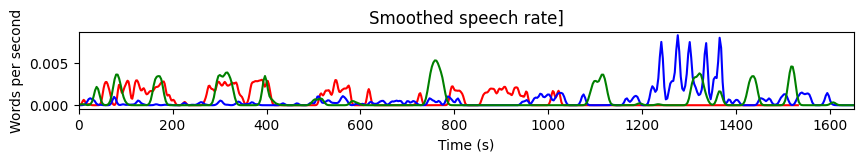

In [186]:
plt.figure(figsize=(10, 1))
for speaker, df in enumerate(words):
    rows = df[df["backchannel"] == False]
    rows['start'].plot.kde(bw_method=.01, color=["r","b", "g"][speaker])
    plt.ylabel("Words per second")
    plt.xlabel("Time (s)")
    plt.title("Smoothed speech rate]")

plt.xlim(0, 1650)

# plt.yticks([0,1,2])

In [108]:
word_starts = []
for segment in result["segments"]:
    for word in segment["words"]:
        word_starts.append(word["start"])

len(word_starts)

712

In [ ]:
res = [transcribe(filepath) for filepath in files ]

<Axes: >

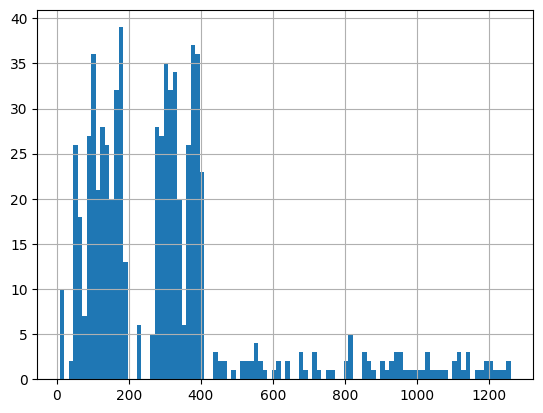

In [120]:
pd.Series(word_starts).hist(bins=100)

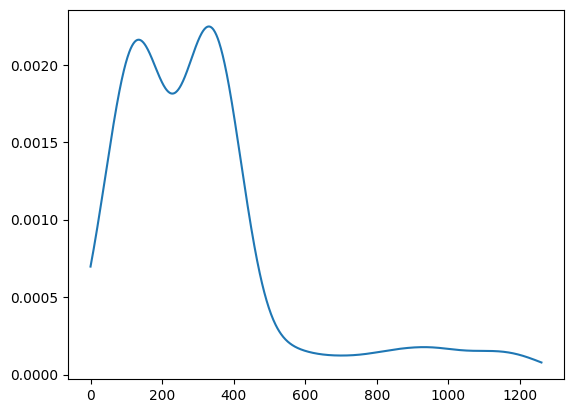

In [119]:
kernel = stats.gaussian_kde(word_starts)
x = np.linspace(0, np.max(word_starts), 1000)
y = kernel(x)

plt.plot(x, y)
